# Week 6 Lab

In [9]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


C:\Softwares\Python\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['floor', 'sin', 'plotting', 'gcd', 'reshape', 'log', 'array', 'cos', 'var', 'sign', 'plot', 'vectorize', 'lcm', 'tan', 'conjugate', 'interactive', 'Polygon', 'mod', 'ones', 'seterr', 'exp', 'fft', 'poly', 'pi', 'f', 'multinomial', 'test', 'power', 'roots', 'sinh', 'source', 'binomial', 'product', 'partition', 'cbrt', 'sinc', 'transpose', 'beta', 'invert', 'sqrt', 'eye', 'diff', 'diag', 'ifft', 'solve', 'nan', 'gamma', 'Circle', 'trunc', 'prod', 'cosh', 'trace', 'det', 'deprecated', 'tanh', 'zeros', 'Line2D', 'flatten', 'add', 'erf', 'take', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\Â∞àÊ°à\\ÂæÖËôïÁêÜ\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/Â∞àÊ°à/ÂæÖËôïÁêÜ/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *

## ËóâÁî± sinc ÊñπÊ≥ïÁî¢ÁîüÁöÑ impulse response ‰æÜÁî¢Áîü Low pass filterÔºåÊúÉÊúâÁ≤æÂ∫¶ÁöÑÂïèÈ°å

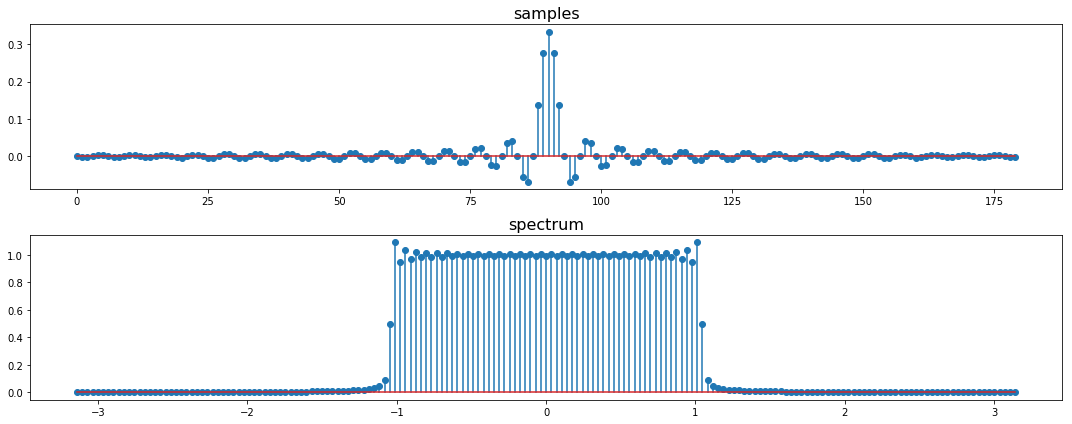

In [11]:
h = Filter.low_pass_filter_impulse_response(cutoff_ratio = 1/3)
H = Fourier.dtft(h)

## ÂÖàÁî¢Áîü ideal low pass filter ÁöÑ spectrumÔºåÂÜçÁî¢ÁîüÂ∞çÊáâÁöÑ impulse response

C:\Softwares\Python\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


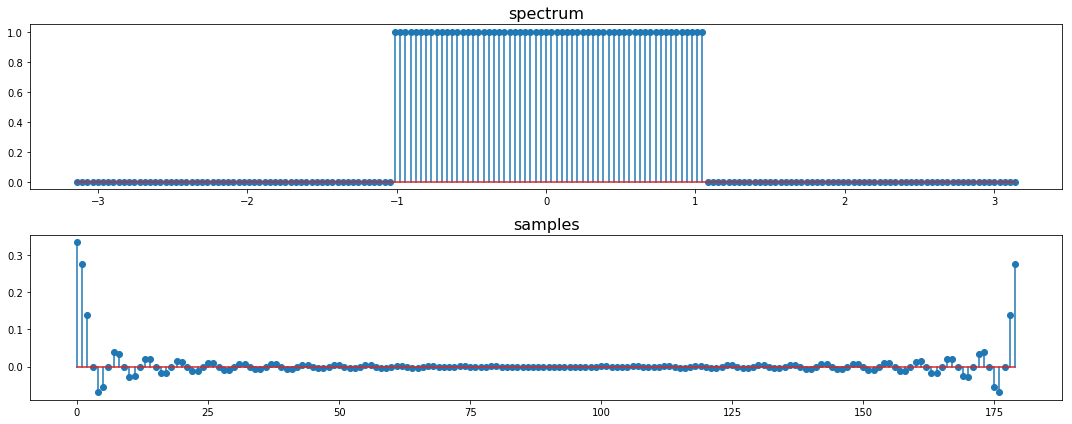

In [12]:
w = DSP.get_freq_bins()
H = np.zeros_like(w)
H[(-np.pi/3 <= w) & (w <= np.pi/3)] = 1
h = Fourier.idtft(H)

# ‰ΩøÁî® Window method ‰æÜË®≠Ë®àÂØ¶Áî®ÁöÑ filter

### ‰ΩøÁî® Sinc function ÊôÇÔºå M = 1000 ÊâÄÁî¢ÁîüÁöÑ impulse response Â∑≤Á∂ìÂèØ‰ª•ÂæàÂÆåÂñÑÁöÑÁï∂‰Ωú ideal low pass filter

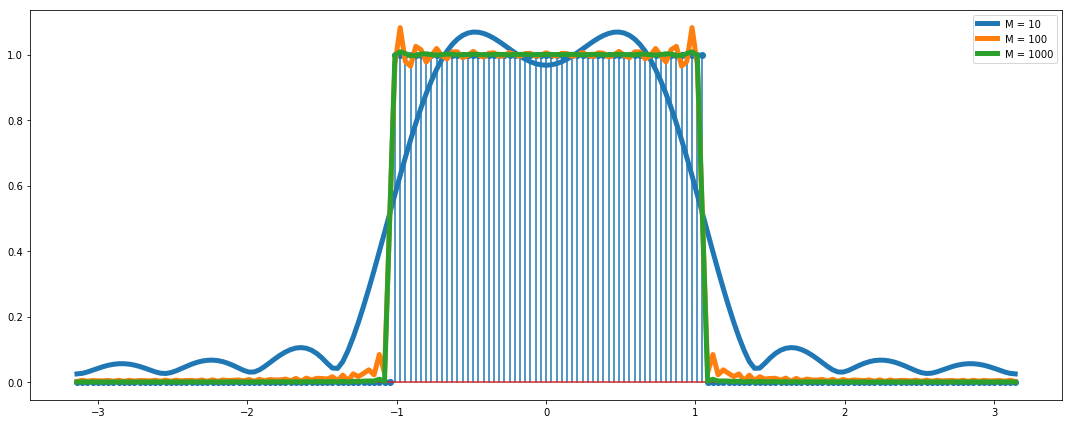

In [13]:
from scipy.signal import hilbert


w = DSP.get_freq_bins()
plt.figure(figsize = TWO_ROWS_FIGSIZE)

def plot_lp_spectrum(w):
    Fourier.plot = True
    plt.stem(w, H)
    
def plot_envelopes(w):
    Hs = []
    
    Fourier.plot = False
    for M in 10**np.arange(1, 4): 
        h = Filter.low_pass_filter_impulse_response(cutoff_ratio = 1/3, n_samples = M)
        Hs.append((M, Fourier.dtft(h)))

    Fourier.plot = True
    for H_m in Hs:
        plt.plot(w, hilbert(abs(H_m[1])), linewidth = 5, label = 'M = {}'.format(H_m[0]))    

plot_lp_spectrum(w)
plot_envelopes(w)
plt.legend()
plt.tight_layout()
plt.show()

### ‰ΩøÁî® window_size = 90 ÁöÑ window Áõ¥Êé•Êì∑Âèñ ideal low pass filter ÁöÑ impulse responseÔºåÊâçËÉΩÂÆåÁæéË§áË£ΩÊïàÊûú
‰ΩÜÊòØ 90 ÈÇÑÊòØÂ§™Â§ß‰∫Ü‰∏Ä‰∫õ

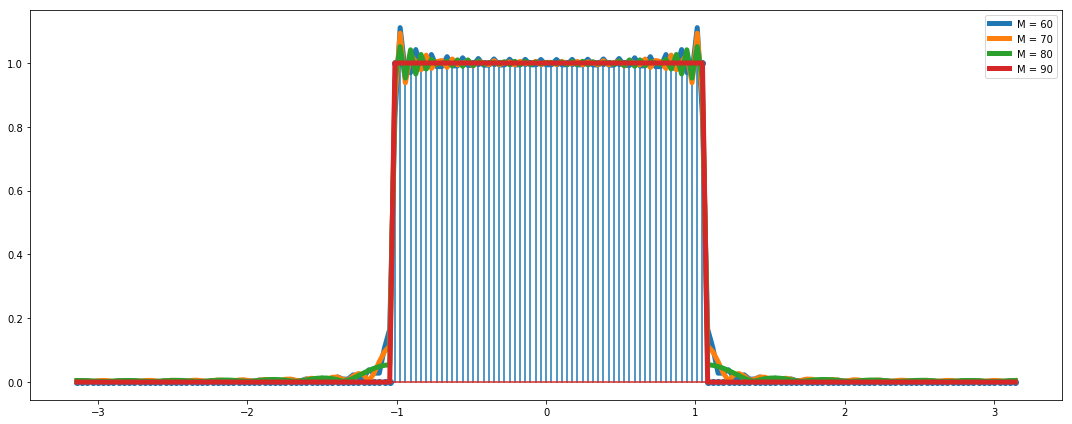

In [14]:
w = DSP.get_freq_bins()
plt.figure(figsize = TWO_ROWS_FIGSIZE)

    
def chunk_ir(h, M = 9):
    N = len(h)
    h1_l = h[N//2+1:][-M:]
    h1_r = h[:N//2][:M]
    h1 = np.concatenate((h1_l, h1_r)) 
    return h1
    
def plot_envelopes(w):
    Hs = []
    
    Fourier.plot = False 
    for M in 10*np.arange(6, 10):   
        h1 = chunk_ir(h, M)        
        Hs.append((M, Fourier.dtft(h1)))

    Fourier.plot = True
    for H_m in Hs:
        plt.plot(w,  hilbert(abs(H_m[1])), linewidth = 5, label = 'M = {}'.format(H_m[0]))    

plot_lp_spectrum(w)
plot_envelopes(w)
plt.legend()
plt.tight_layout()
plt.show()

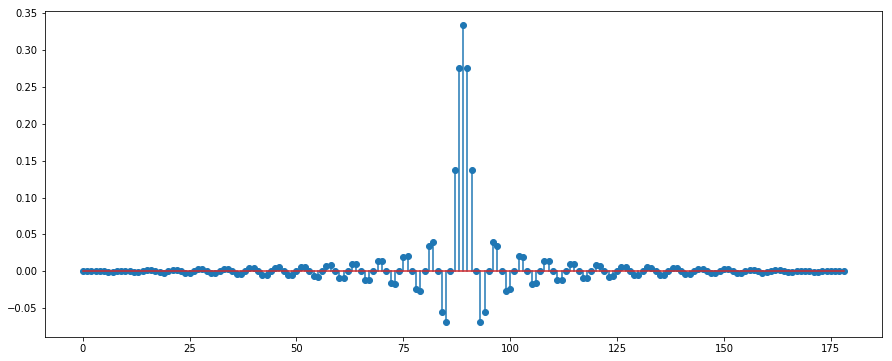

In [15]:
# M = 90 is good enough.

h1 = chunk_ir(h, 90)

plt.figure(figsize = TWO_ROWS_FIGSIZE)
plt.stem(h1);

### ÂêÑÁ®Æ window ÁöÑÊïàÊûú

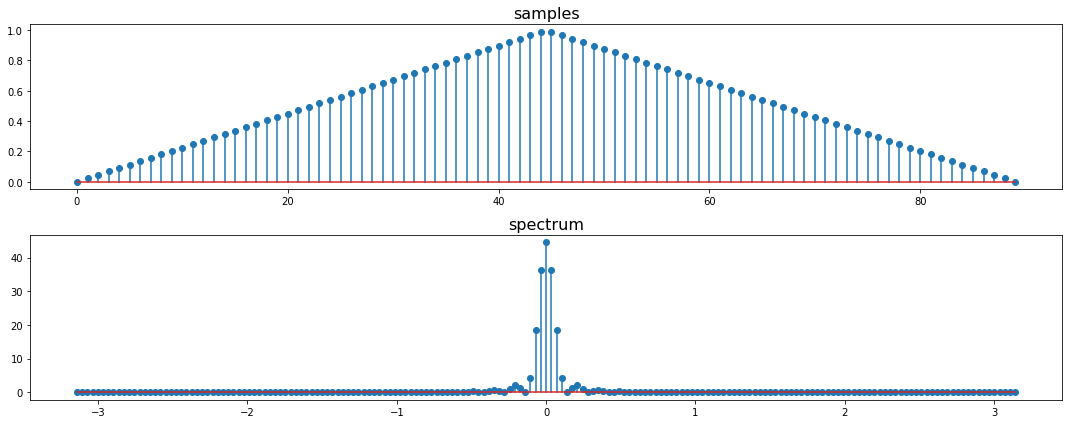

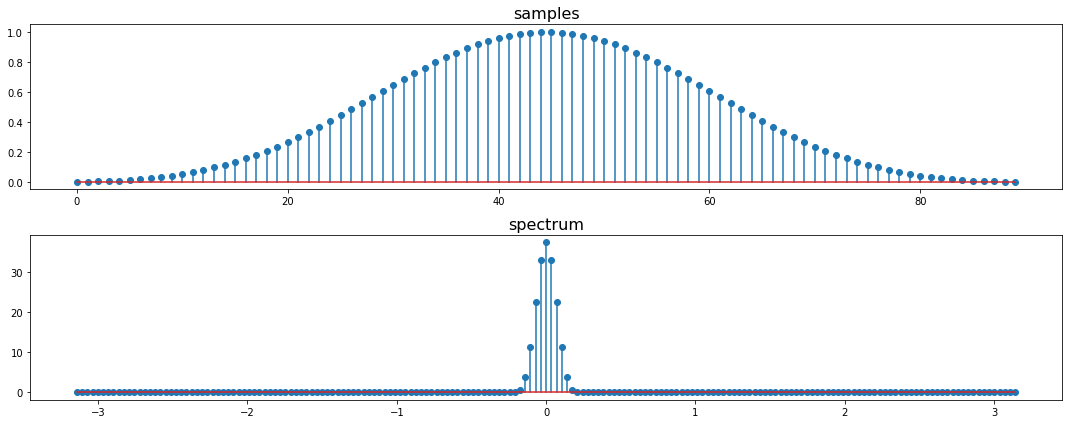

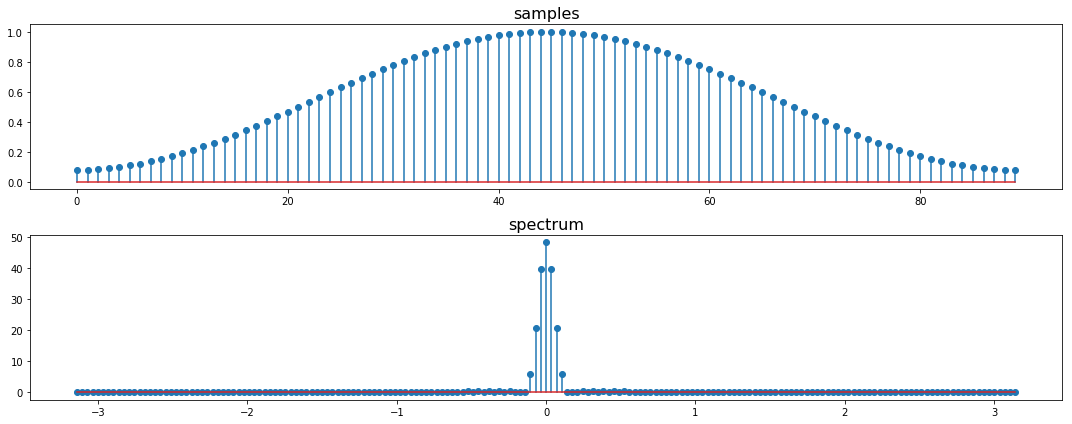

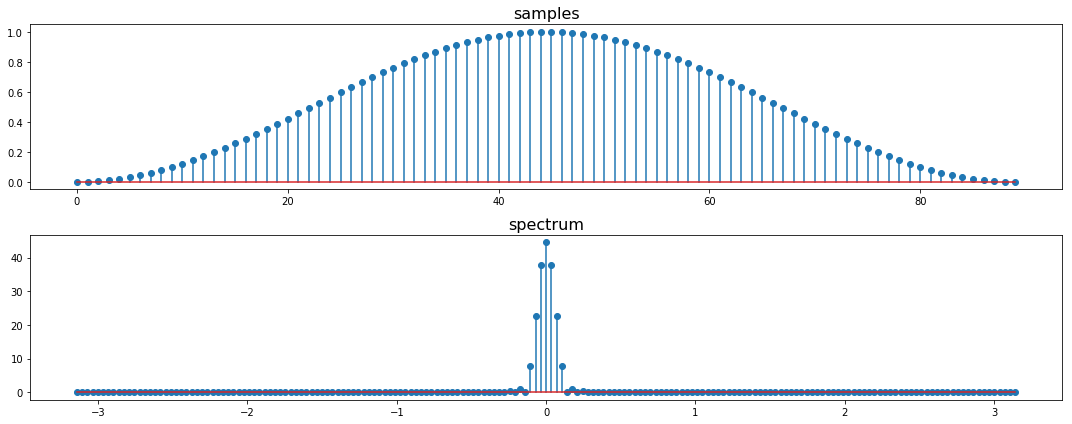

In [16]:
def plot_window_function(M = 90):
    for fn in ['bartlett', 'blackman', 'hamming', 'hanning']:#, 'kaiser']:
        f = getattr(np, fn)
        _ = Fourier.dtft(f(M))
        
plot_window_function()

### ‰ΩøÁî® blackman window ‰æÜÁî¢ÁîüË∂®Ëøë ideal low-pass filter ÁöÑ impulse response

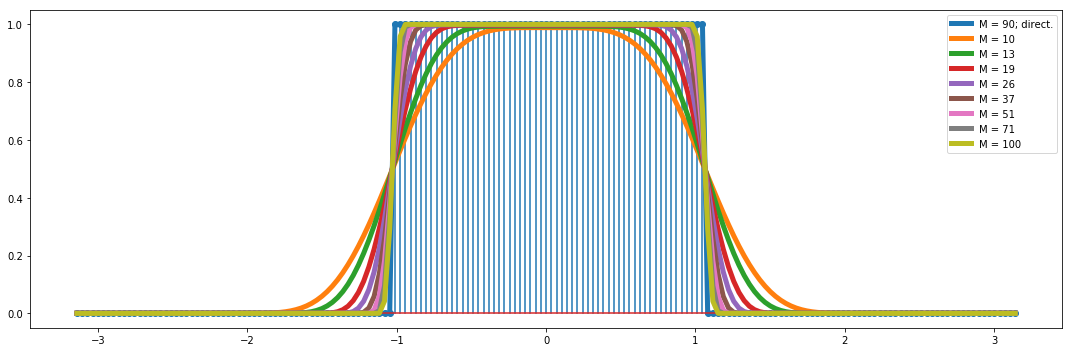

In [17]:
w = DSP.get_freq_bins()
plt.figure(figsize = (15, 5))


# def chunk_ir(h, M):
#     N = len(h)
#     h1_l = h[N//2+1:][-M:]
#     h1_r = h[:N//2][:M]
#     h1 = np.concatenate((h1_l, h1_r)) 
#     return h1

def windowed_fir(h, M, method = 'blackman'):    
    h1 = chunk_ir(h, M)    
    f = getattr(np, method)
    window = f(len(h1))  
    return h1 * window
    
def plot_envelopes(w):
    Hs = []
    
    Fourier.plot = False
    for M in (10**np.linspace(1, 2, 8)).astype(int):   
        h1 = windowed_fir(h, M)
        Hs.append((M, Fourier.dtft(h1)))

    Fourier.plot = True
    for H_m in Hs:
        plt.plot(w,  hilbert(abs(H_m[1])), linewidth = 5, label = 'M = {}'.format(H_m[0]))   
        
Fourier.plot = False
plt.plot(w, hilbert(abs(Fourier.dtft(chunk_ir(h, 90)))), linewidth = 5, label = 'M = {}; direct.'.format(90))

plot_lp_spectrum(w)
plot_envelopes(w)
plt.legend()
plt.tight_layout()
plt.show()

### ÂèØÊòØ‰ΩøÁî® M = 37 ‰æÜÁØÄÁúÅË®àÁÆóË≥áÊ∫ê„ÄÇ‰ΩÜÊòØÂ¶ÇÊûúÈúÄË¶ÅÂæàÁ≤æÁ¢∫ÔºåÈÇÑ‰∏çÂ¶ÇÁõ¥Êé•Áî± ideal impulse response Áõ¥Êé•Âèñ M = 90 ÁöÑÂçÄÂ°ä„ÄÇ

### Flip IDTFT ÊâÄÁî¢Âá∫ÁöÑ  samples

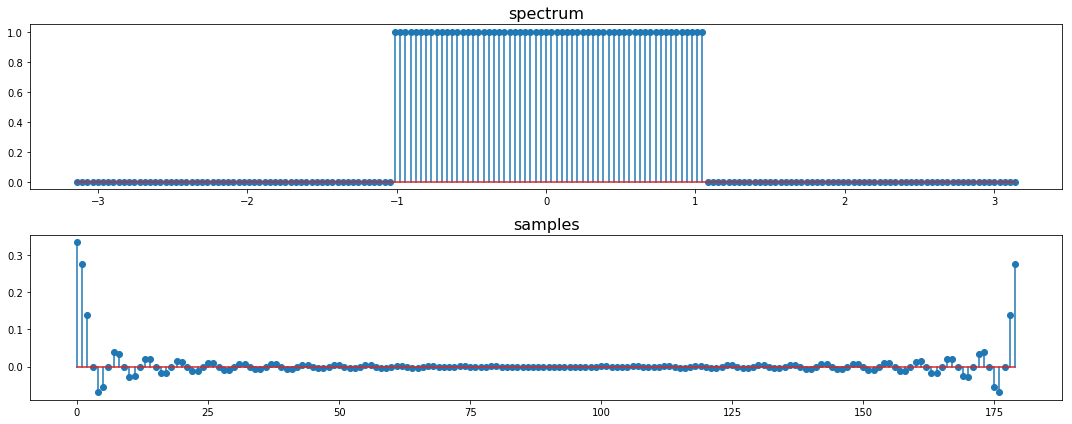

In [18]:
h = Fourier.idtft(H, plt_abs=False)

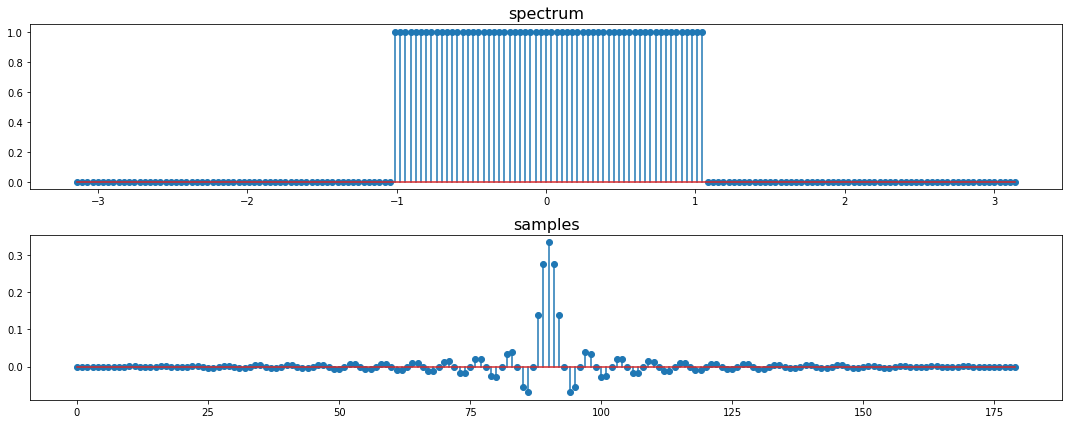

In [19]:
h = Fourier.idtft(H, plt_abs=False, flip_samples=True)

### Summary of Lesson 4.6
In this lesson, we have studied different methods to approximate an ideal filter.

The first method is called **impulse truncation**: we simply truncate the filter impulse response over a finite set of NN points, centered around zero. While, it seems like a good idea in the first place, as this method minimises the mean squared error between the ideal and the approximate filter, this method suffers from an important limitation known as **Gibbs phenomenon**. The maximum error around the transition band cannot be made arbitrarily small, even when we increase the number of points N.

The impulse truncation can be interpreted as the product of the ***ideal filter response*** and a ***rectangular window of N points***. From the **modulation theorem**, the ***DTFT of the product of two signals is equivalent to the convolution of their DTFTs***. Hence, the choice of window influences the quality of the approximation results. The **window method** is just a generalization of the impulse truncation method where we use a different window shape. For example, by using a triangular window, we reduce the Gibbs error at the price of a longer transition.

The third approximation we have studied is called **frequency sampling**: we sample the impulse of the ideal filter in the frequency domain and obtain the impulse response of the filter by computing the IDFT of these samples. Again, this method does not allow to control the maximum error in the passband and/or the stopband.

# Z transform 
## 4.8.a Intuitive IIR designs

## Z transform of Leaky Integrator

$
\begin{align}
y[n] &= (1-\lambda)x[n] + \lambda y[n-1] \\
Z\{y[n]\} &= Z\{(1-\lambda)x[n] + \lambda y[n-1]\} \\
Y(z) &= {(1-\lambda)X(z) + \lambda z^{-1} Y(z)} \\ 
Y(z) - \lambda z^{-1} Y(z) &= (1-\lambda)X(z) \\
(1-\lambda z^{-1}) Y(z) &= (1-\lambda)X(z) \\
H(z) = \frac{Y(z)}{X(z)} &= \frac{1-\lambda}{1-\lambda z^{-1}}
\end{align}
$

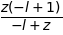

In [20]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = (1 - l)
# num = num.collect(z).rewrite(cos).simplify()

denum = (1 - l*z**(-1))
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

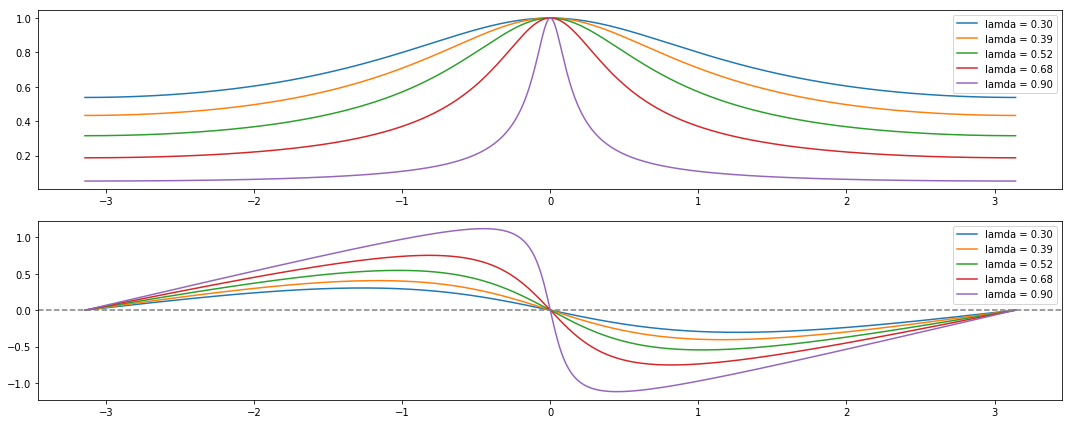

In [21]:
fig, axs = plt.subplots(2, 1, figsize = TWO_ROWS_FIGSIZE)

lamdas = 10**np.linspace(np.log10(0.3), np.log10(0.9), 5)
w = np.linspace(-1, 1, 1000) * np.pi
z = np.exp(1j*w)

def get_H(l = 0.97):
#     H = (1-l) / (1-l*z**(-1))
    H = z*(1-l) / (z-l)  # this also do.
    return H
    
for l in lamdas:     
    H = get_H(l = l)
    axs[0].plot(w, np.abs(H) , label = 'lamda = {:0.2f}'.format(l)) 
    axs[1].plot(w, np.angle(H) , label = 'lamda = {:0.2f}'.format(l))

axs[1].axhline(0, color = 'grey', linestyle = '--')    
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

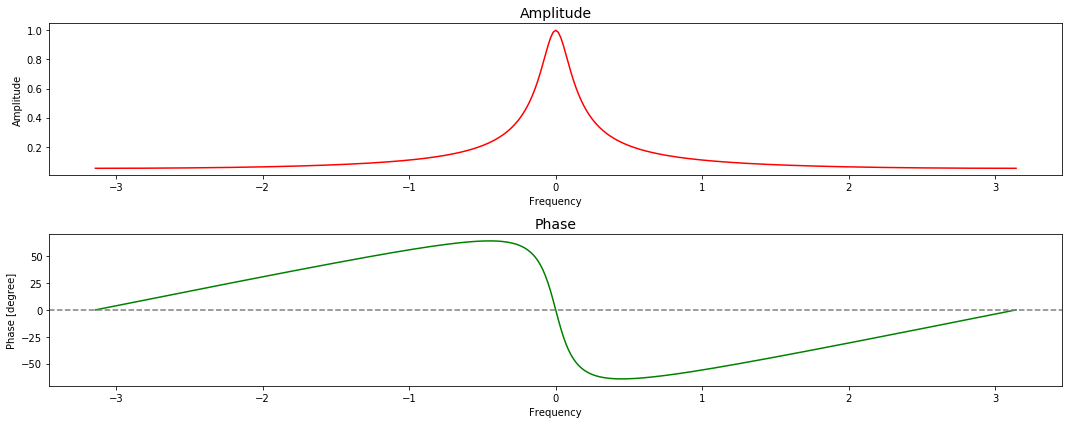

In [22]:
l = 0.9
f, h = Filter.get_H_from_polynomials([[1-l]],[[1, -l]], 360, plot = True)

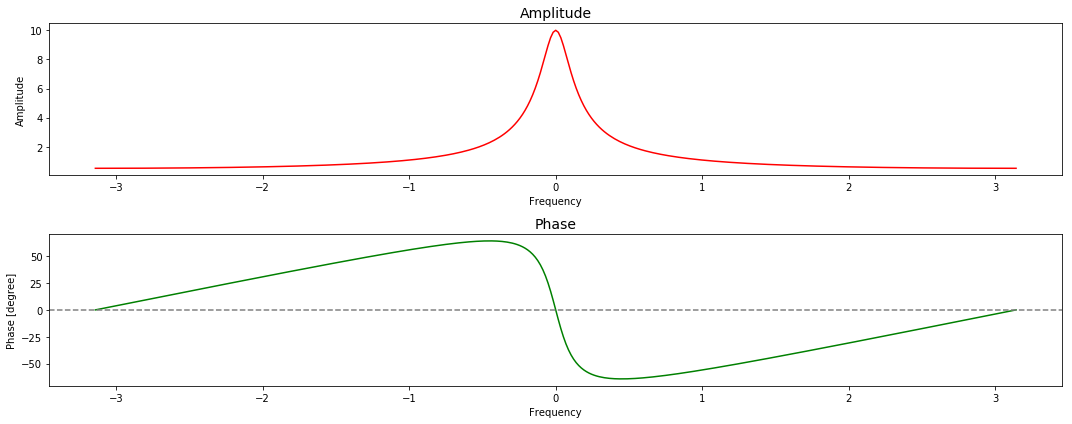

In [69]:
l = 0.9
f, h = Filter.get_H_from_zeros_poles([0],[l], 360, plot = True)

## Z transform of resonator (band-pass filter)
$
\begin{align}
y[n] &= G0 x[n] + a1 y[n-1] + a2 y[n-2] \\
H(z) = \frac{Y(z)}{X(z)} &= \frac{G0}{(1-p z^{-1})(1-\bar{p} z^{-1})} \hspace{2cm} p = \lambda e^{j\omega_0} \\
H(z) &= \frac{G0}{1 - (p +\bar{p})z^{-1} + p\bar{p} z^{-2}} \\
H(z) &= \frac{G0}{1 - 2\lambda\cos(\omega_0)z^{-1} + |\lambda|^2 z^{-2}} \space \Rightarrow \space a1 = -2\lambda\cos(\omega_0) ;\space a2 = |\lambda|^2 \\
\end{align}
$

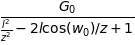

In [24]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = G0
# num = num.collect(z).rewrite(cos).simplify()

denum = ((1-l*p*z**(-1))*(1-l*conjugate(p)*z**(-1)))
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

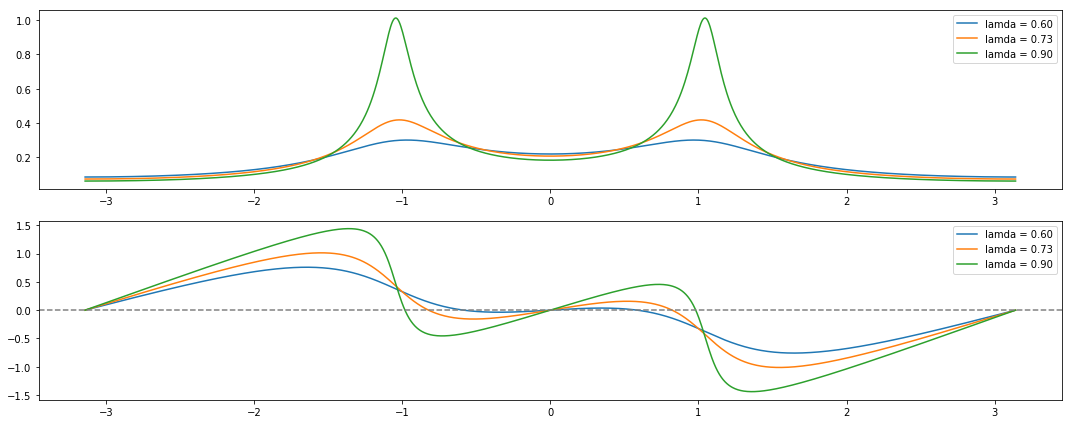

In [73]:
fig, axs = plt.subplots(2, 1, figsize = TWO_ROWS_FIGSIZE)

lamdas = 10**np.linspace(np.log10(0.6), np.log10(0.9), 3)
w = np.linspace(-1, 1, 1000) * np.pi
z = np.exp(1j*w)

def get_H(l = 0.97, w0 = np.pi/3, G0 = 1/6): 
    p = np.exp(1j*w0)
    H = G0 / ((1-l*p*z**(-1))*(1-l*np.conj(p)*z**(-1)))
    return H

w0 = np.pi/3
for l in lamdas:     
    H = get_H(l = l, w0 = w0)
    axs[0].plot(w, np.abs(H) , label = 'lamda = {:0.2f}'.format(l)) 
    axs[1].plot(w, np.angle(H) , label = 'lamda = {:0.2f}'.format(l))

axs[1].axhline(0, color = 'grey', linestyle = '--')    
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

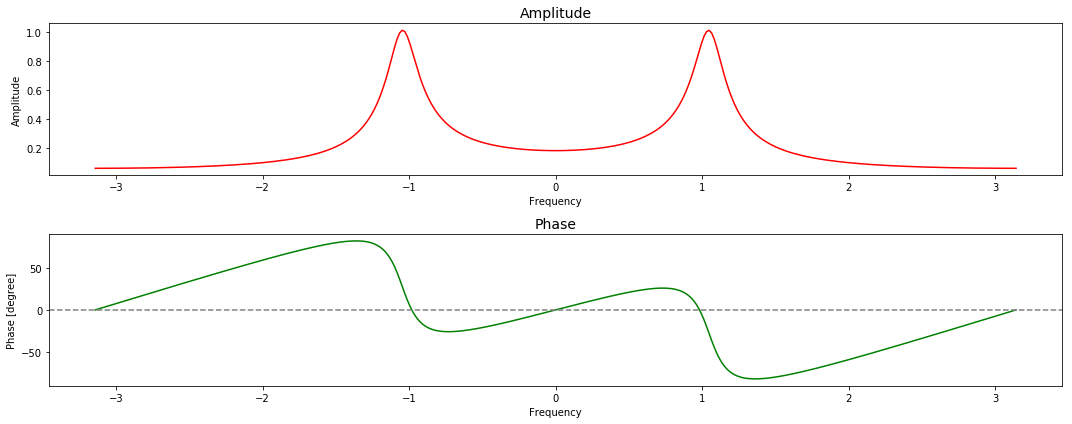

In [74]:
l = 0.9
G0 = 1 / 6
w0 = np.pi/3
p = np.exp(1j * w0)

f, h = Filter.get_H_from_polynomials([[G0]], [[1, -l * p], [1, -l * np.conj(p)]], 360, plot = True)

## Z transform of DC-removal
- DC-balanced signal has zero-sum.  
- DTFT at 0 is 0.  

$
\begin{align}
\lim_{N \to \infty} \sum_{n = -N}^{N} x[n] &= 0 \\
X(0) = \sum_{n = -\infty}^{\infty} x[n]e^{j0n} = \sum_{n = -\infty}^{\infty} x[n] &= 0 \\
\end{align}
$  
  
  
### According to Z-tranform:  
  
$
\begin{align}
\sum_{k = 0}^{N-1} a_k y[n-k] &= \sum_{k = 0}^{M-1} b_k x[n-k] \\
Y(z)\sum_{k=0}^{N-1}a_k z^{-k} &= X(z) \sum_{k=0}^{M-1} b_k z^{-k} \\
H(z) = \frac{Y(z)}{X(z)} &= \frac{\sum_{k=0}^{M-1} b_k z^{-k}}{\sum_{k=0}^{N-1}a_k z^{-k}} \\
H(z) &= \frac{1 - z^{-1}}{1 - \lambda z^{-1}} \Rightarrow y[n] = \lambda y[n-1] + x[n] - x[n-1] \\
\end{align}
$

In [26]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = 1-z**-1
num = num.collect(z).rewrite(cos).simplify()

denum = (1-l*z**-1)
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

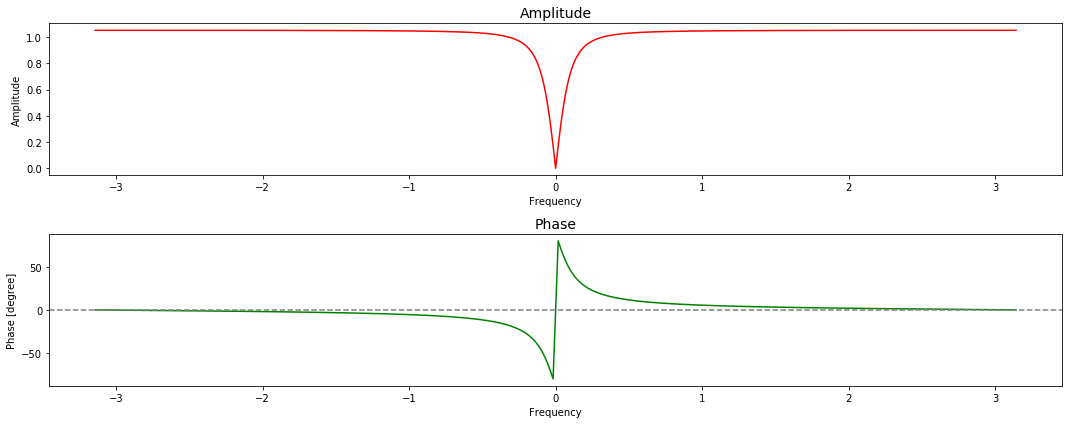

In [76]:
l = 0.9 
f, h = Filter.get_H_from_polynomials([(1, -1)],[(1, -l)], 360, plot = True)

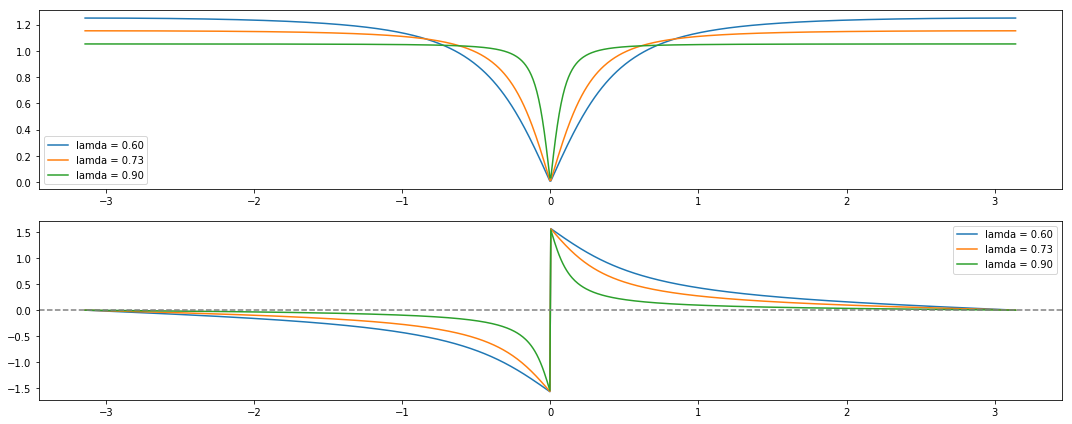

In [27]:
fig, axs = plt.subplots(2, 1, figsize = TWO_ROWS_FIGSIZE)

lamdas = 10**np.linspace(np.log10(0.6), np.log10(0.9), 3)
w = np.linspace(-1, 1, 1000) * np.pi
z = np.exp(1j*w)

def get_H(l):
#     H = (1 - z**-1) / (1 - l * z**-1)
    H = (z-1)/(z-l)
    return H
    
for l in lamdas:     
    H = get_H(l = l)
    axs[0].plot(w, np.abs(H) , label = 'lamda = {:0.2f}'.format(l)) 
    axs[1].plot(w, np.angle(H) , label = 'lamda = {:0.2f}'.format(l))

axs[1].axhline(0, color = 'grey', linestyle = '--')    
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

## Z transform of Hum-removal
- DC-balanced signal has zero-sum.  
- DTFT at 0 is 0.  

$
\begin{align}
X(j\omega_0) = \sum_{n = -\infty}^{\infty} x[n]e^{j\omega_0n} &= 0 \\
\end{align}
$  
  
  
### According to Z-tranform:  
  
$
\begin{align}
p &= e^{j\omega_0} \\
H(z) &= \frac{(1 - p z^{-1})(1 - \bar{p} z^{-1})}{(1 - \lambda p z^{-1})(1 - \lambda \bar{p} z^{-1})} \\
\end{align}
$

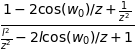

In [28]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = ((1-p*z**(-1))*(1-conjugate(p)*z**(-1))) 
num = num.collect(z).rewrite(cos).simplify()

denum = ((1-l*p*z**(-1))*(1-l*conjugate(p)*z**(-1)))
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

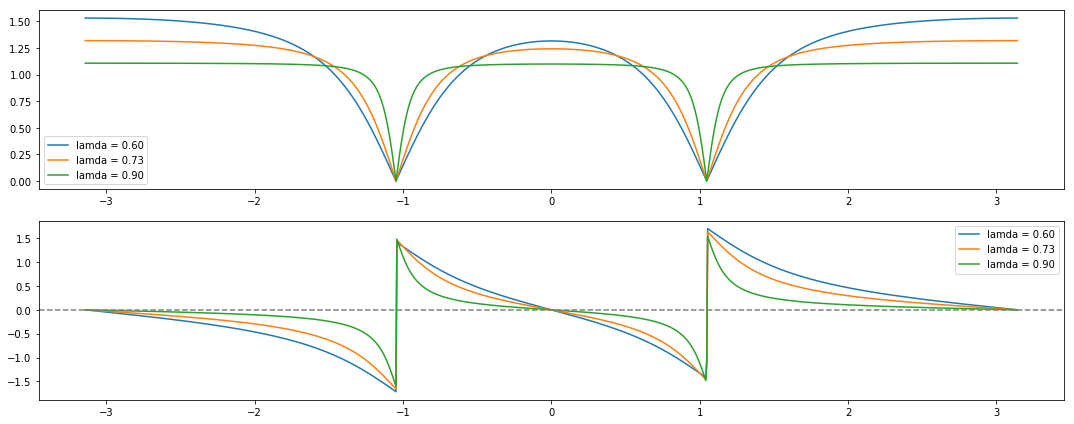

In [29]:
fig, axs = plt.subplots(2, 1, figsize = TWO_ROWS_FIGSIZE)

lamdas = 10**np.linspace(np.log10(0.6), np.log10(0.9), 3)
w = np.linspace(-1, 1, 1000) * np.pi
z = np.exp(1j*w)

def get_H(l = 0.97, w0 = np.pi/3, G0 = 1/6): 
    p = np.exp(1j*w0)
    num = (1-p*z**-1) * (1-np.conj(p)*z**-1) 
    denum = (1-l*p*z**-1) * (1-l*np.conj(p)*z**-1)
    H = num/denum
    return H

w0 = np.pi/3
for l in lamdas:     
    H = get_H(l = l, w0 = w0)
    axs[0].plot(w, np.abs(H) , label = 'lamda = {:0.2f}'.format(l)) 
    axs[1].plot(w, np.angle(H) , label = 'lamda = {:0.2f}'.format(l))

axs[1].axhline(0, color = 'grey', linestyle = '--')    
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

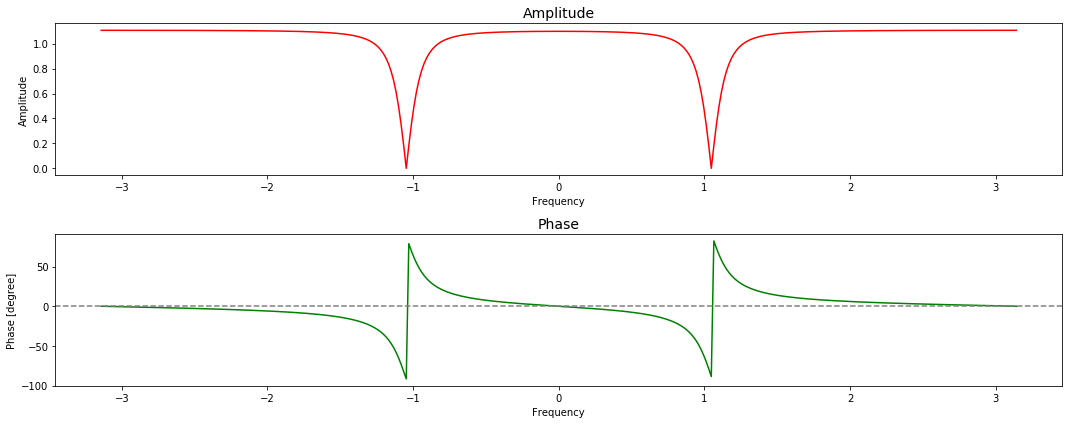

In [77]:
l = 0.9 
w0 = np.pi/3
p = np.exp(1j*w0)
f, h = Filter.get_H_from_polynomials([(1, -p), (1, -np.conj(p))],[(1, -l*p), (1, -l*np.conj(p))], 360, plot = True)

# 4.9.a IIR designs

## Butterworth


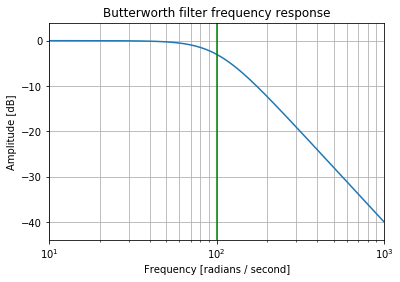

In [30]:
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(2, 100, 'lowpass', analog=True)  # {‚Äòlowpass‚Äô, ‚Äòhighpass‚Äô, ‚Äòbandpass‚Äô, ‚Äòbandstop‚Äô}, 
w, h = signal.freqs(b, a)

plt.plot(w, 20 * np.log10(abs(h)))

plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [31]:
# Filter.plot_freq_response(w, h)

## Chebyshev 

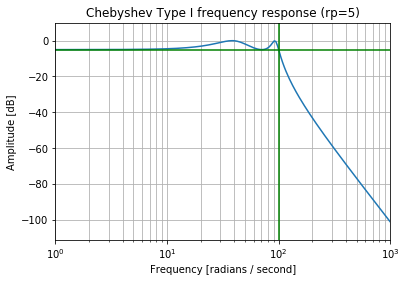

In [32]:
>>> b, a = signal.cheby1(4, 5, 100, 'low', analog=True)
>>> w, h = signal.freqs(b, a)

>>> plt.plot(w, 20 * np.log10(abs(h)))

>>> plt.xscale('log')
>>> plt.title('Chebyshev Type I frequency response (rp=5)')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.axhline(-5, color='green') # rp
>>> plt.show()

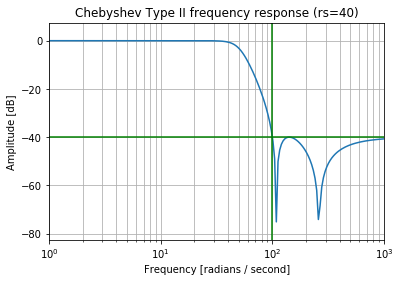

In [33]:
>>> b, a = signal.cheby2(4, 40, 100, 'low', analog=True)
>>> w, h = signal.freqs(b, a)

>>> plt.plot(w, 20 * np.log10(abs(h)))

>>> plt.xscale('log')
>>> plt.title('Chebyshev Type II frequency response (rs=40)')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.axhline(-40, color='green') # rs
>>> plt.show()

## Elliptic

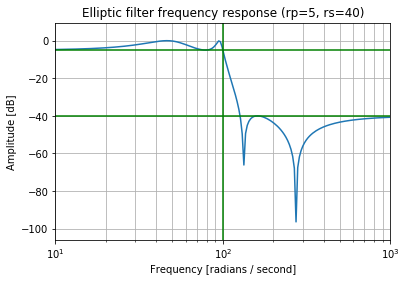

In [34]:
>>> b, a = signal.ellip(4, 5, 40, 100, 'low', analog=True)
>>> w, h = signal.freqs(b, a)

>>> plt.semilogx(w, 20 * np.log10(abs(h)))

>>> plt.title('Elliptic filter frequency response (rp=5, rs=40)')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.axhline(-40, color='green') # rs
>>> plt.axhline(-5, color='green') # rp
>>> plt.show()

## 4.9.c FIR designs

### Minimax

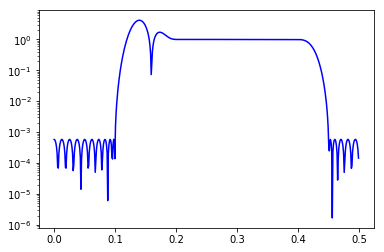

In [35]:
>>> from scipy import signal
>>> bpass = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
>>> freq, response = signal.freqz(bpass)
>>> ampl = np.abs(response)
>>>
>>> import matplotlib.pyplot as plt
>>> fig = plt.figure()
>>> ax1 = fig.add_subplot(111)
>>> ax1.semilogy(freq/(2*np.pi), ampl, 'b-')  # freq in Hz
>>> plt.show()

## 4.8.b

## Fractional delay


### ÂéüÂßãÁöÑË®äËôü

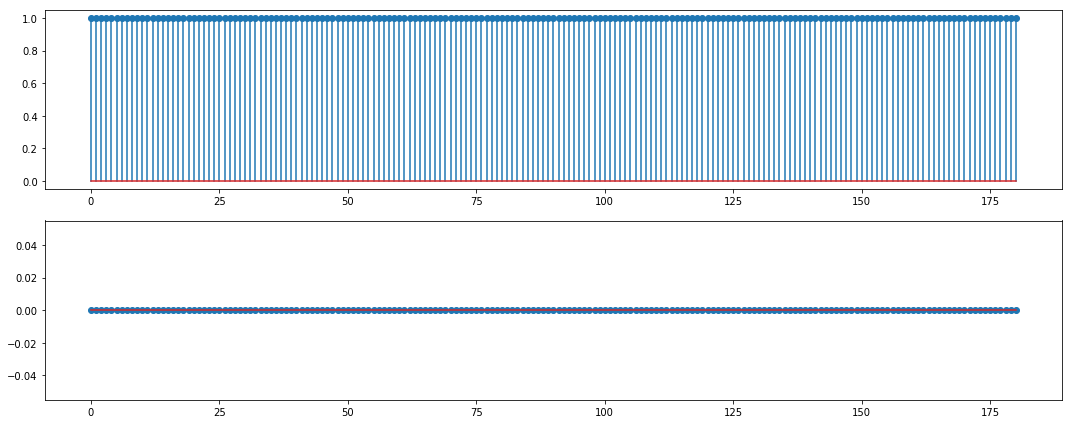

In [36]:
n = np.arange(N_SAMPLES)
w = DSP.get_freq_bins()
X = np.ones_like(w)
DSP.plot_comparison((np.abs(X), np.angle(X)))

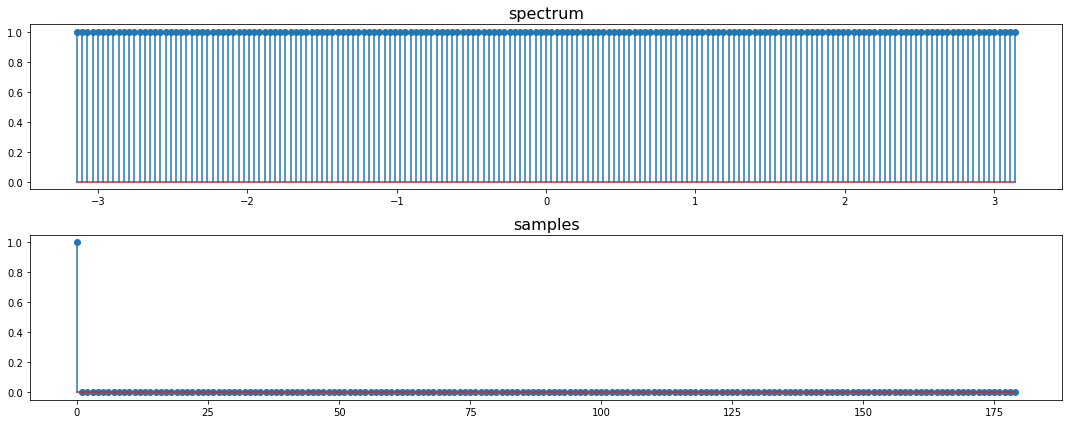

In [37]:
x = Fourier.idtft(X, plt_abs=False)

### ÊôÇÈñì‰∏ä delay ‰∏ÄÂÄã sampleÔºå$\omega$ ‰∏≠ÂêÑÂÄãÈ†ªÁéáÊúÉÁî¢Áîü phase shfitÔºå‰ΩÜËàáÈ†ªÁéáÊàêÊ≠£ÊØîÔºåÂëàÁèæ linear ÁâπÊÄß

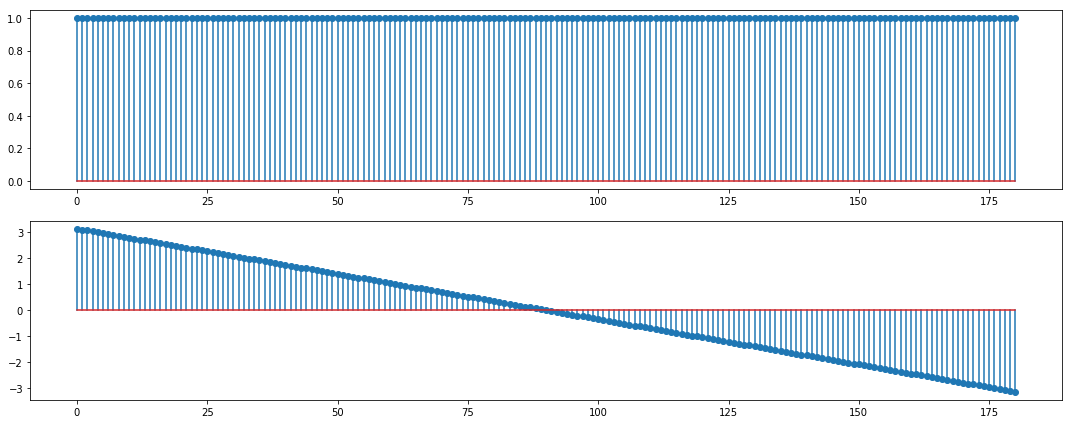

In [38]:
delay = 1
X1 = X * np.exp(1j*w*(-delay))
DSP.plot_comparison((np.abs(X1), np.angle(X1)))

### Ë®äËôüÈ†ªË≠ú‰∏≠ÂèØ‰ª•ÁúãË¶ãÂÄãÈ†ªÁéá real ÈÉ®ÂàÜÁöÑËÆäÂåñ

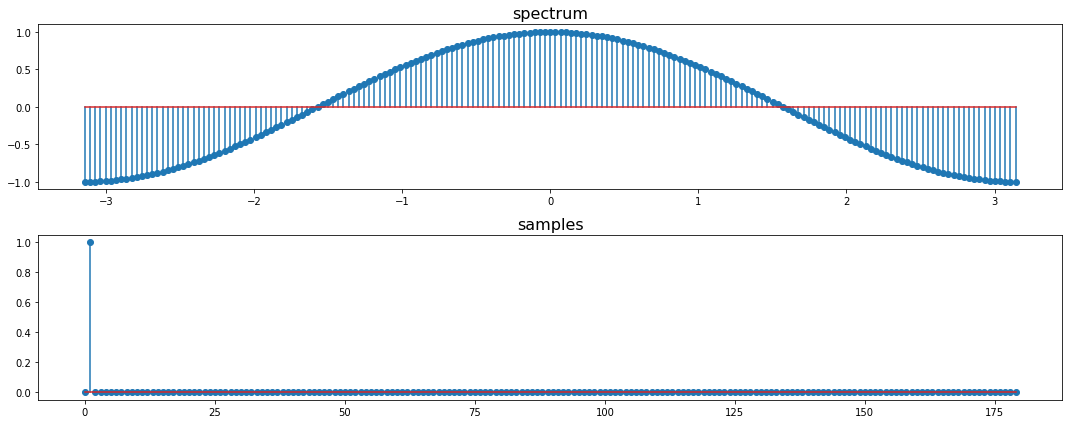

In [39]:
x1 = Fourier.idtft(X1, plt_abs=False)

### Delay ‰∏çÊòØÊï¥Êï∏ÂÄã samples ÁöÑÊÉÖÊ≥ÅÔºå ùúî  ‰∏≠ÂêÑÂÄãÈ†ªÁéá‰πüÊúÉÁî¢Áîü phase shfitÔºå‰∏¶ÈÇÑÊòØÂëàÁèæ linear ÁâπÊÄß

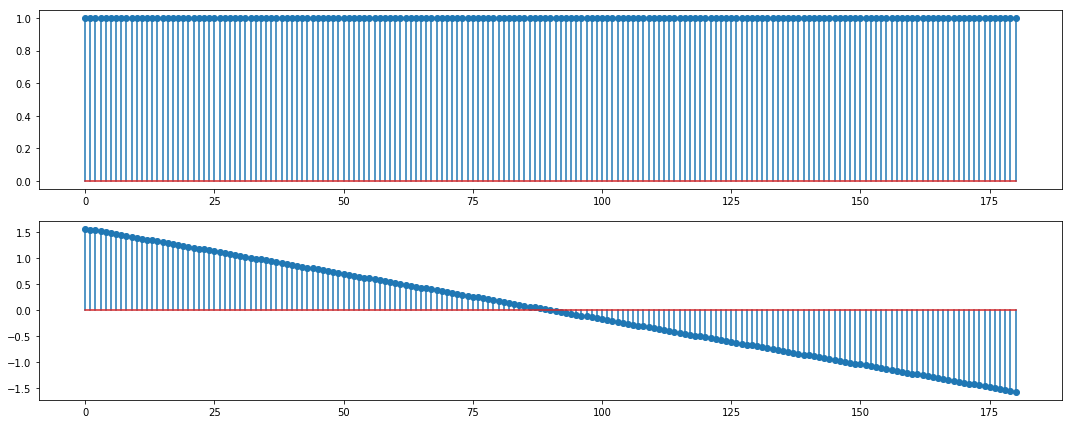

In [40]:
delay = 0.5
X1 = X * np.exp(1j*w*(-delay))
DSP.plot_comparison((np.abs(X1), np.angle(X1)))

### Ë®äËôüÈ†ªË≠ú‰∏≠ÂèØ‰ª•ÁúãË¶ãÂÄãÈ†ªÁéá real ÈÉ®ÂàÜÁöÑËÆäÂåñÔºå‰ΩÜÊòØ samples ‰∏çÂêå‰∫Ü

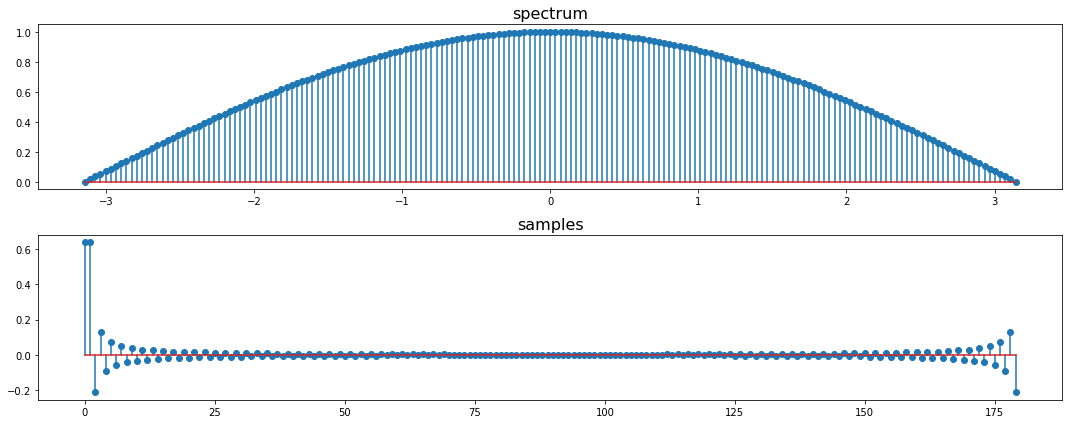

In [41]:
x1 = Fourier.idtft(X1, plt_abs=False, flip_samples=False)

### ‰∏ÄÂÄã sample ÁöÑ delay ÔºåÂÖ∂ IDTFT ÁÇ∫:
$
\begin{align}
h[n] = DTFT\{e^{j\omega d}\} &= \frac{1}{2\pi}\int_{-\pi}^{\pi} e^{-j\omega d} e^{j\omega n} d\omega \\
&= \frac{1}{2\pi}\int_{-\pi}^{\pi} e^{j\omega (n-d)} d\omega \\
&= \frac{1}{\pi(n-d)} \frac{e^{j\pi(n-d)} - e^{-j\pi(n-d)}}{2j}  \\
&= \frac{sin(\pi(n-d))}{\pi(n-d)}  \\
&=sinc(n-d) \\
\end{align}
$  

### Áï∂ d ÁÇ∫Êï¥Êï∏ÁöÑÊôÇÂÄôÔºå Âõ†ÁÇ∫ n-dÁÇ∫Êï¥Êï∏ÔºåÊâÄ‰ª• sinc(n-d) = 0ÔºåÈô§‰∫Ü n=d ÁöÑÊôÇÂÄô sinc(n-d) = sinc(0) = 1


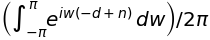

In [42]:
w = symbols('w')
d = symbols('d', real = True)
n = symbols('n', integer = True)
delay = n - d
h = 1/pi2*Integral(E**(-I*w*d) * E**(I*w*n), (w, -pi, pi))
h = h.expand().simplify()
h

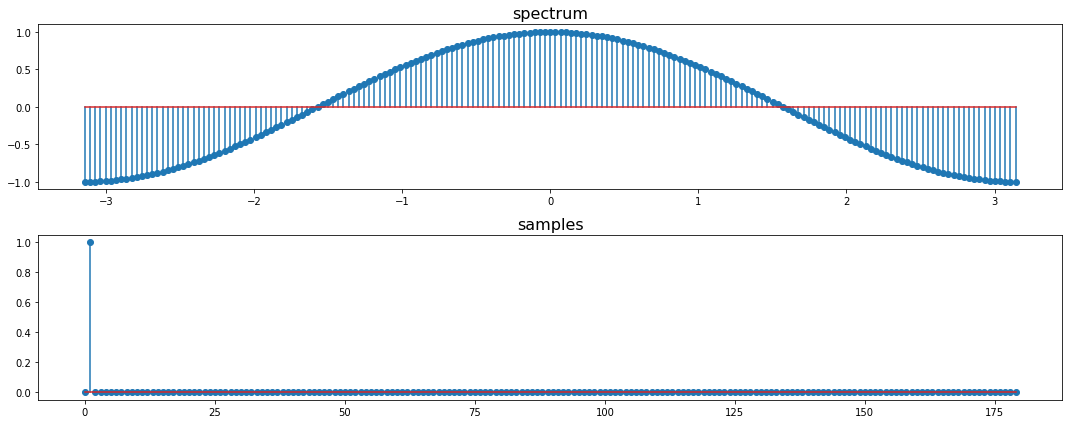

In [43]:
n = np.arange(-N_SAMPLES//2, N_SAMPLES//2)
w = DSP.get_freq_bins()

d = 1
x_delay_1 = Fourier.idtft(np.exp(1j*w*(-d)), plt_abs=False)

###  Áï∂ d ÁÇ∫Êï¥Êï∏ÁöÑÊôÇÂÄôÔºå Âõ†ÁÇ∫ n-dÁÇ∫Êï¥Êï∏ÔºåÊâÄ‰ª• sinc(n-d) = 0ÔºåÈô§‰∫Ü n=d ÁöÑÊôÇÂÄô sinc(n-d) = sinc(0) = 1

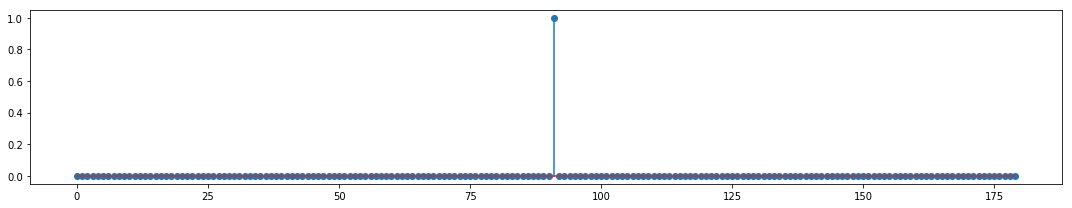

In [44]:
d = 1
DSP.plot_comparison([np.sinc(n-d)])

###  Áï∂ d ‰∏çÁÇ∫Êï¥Êï∏ÁöÑÊôÇÂÄôÔºå Âõ†ÁÇ∫ n-d ‰∏çÁÇ∫Êï¥Êï∏ÔºåÊâÄ‰ª• sinc(n-d) != 0

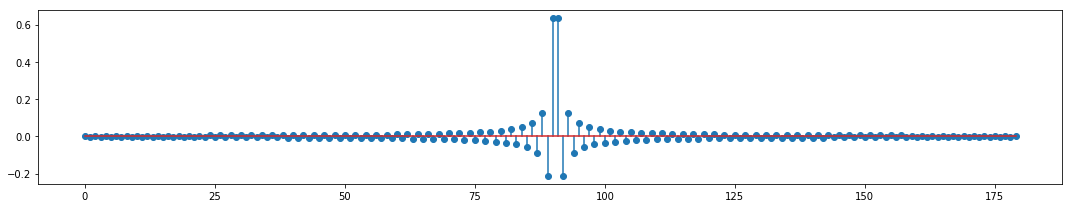

In [45]:
d = 0.5
DSP.plot_comparison([np.sinc(n-d)])

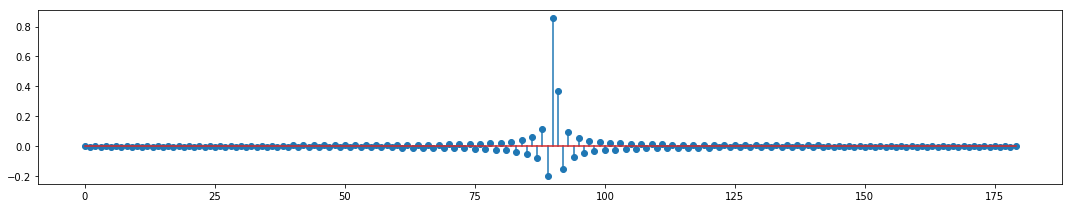

In [46]:
d = 0.3
DSP.plot_comparison([np.sinc(n-d)])

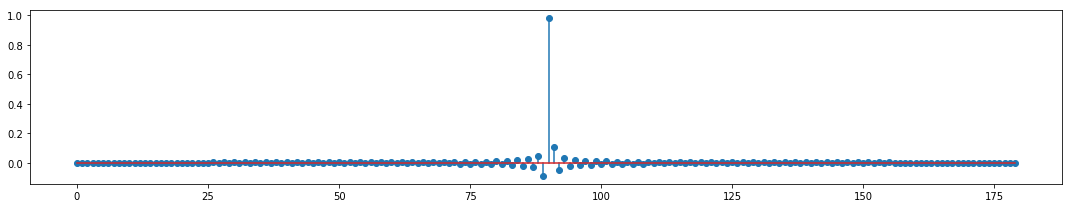

In [47]:
d = 0.1
DSP.plot_comparison([np.sinc(n-d)])

## Hilbert filter
$
\begin{align}
H(e^{j\omega})[\delta(\omega - \omega_0) + \delta(\omega + \omega_0) ]  &= -j[\delta(\omega - \omega_0) - \delta(\omega + \omega_0) ] \\
H(e^{j\omega_0)} &= -j ; \space for 0<=\omega<\pi \\
H(e^{-j\omega_0)} &= j ; \space for -\pi<=\omega<0 \\
\end{align}
$

### Hilbert filter ÁöÑ frequency response

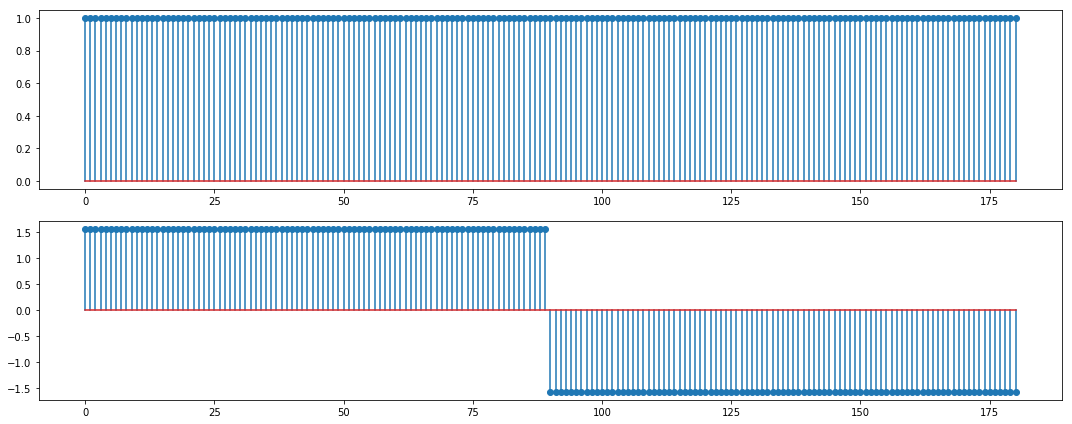

In [48]:
n = np.arange(N_SAMPLES)
w = DSP.get_freq_bins()
H = np.zeros_like(w) * 1j
H[w>=0] = -1j
H[w<0] = 1j
DSP.plot_comparison((np.abs(H), np.angle(H)))

$
\begin{align}
h[n] &= \frac{1}{2\pi} (\int_{-\pi}^{0} je^{j\omega n } d\omega + \int_{0}^{\pi} -je^{j\omega n } d\omega)  \\
&= \frac{1}{2\pi n}[1-e^{-j\pi n} - e^{-j\pi n } + 1]  \\
&=  \begin{cases} 
      \frac{2}{ \pi n} &  n \space odd \\       
      0 &  n \space even \\   
   \end{cases}
\end{align}
$

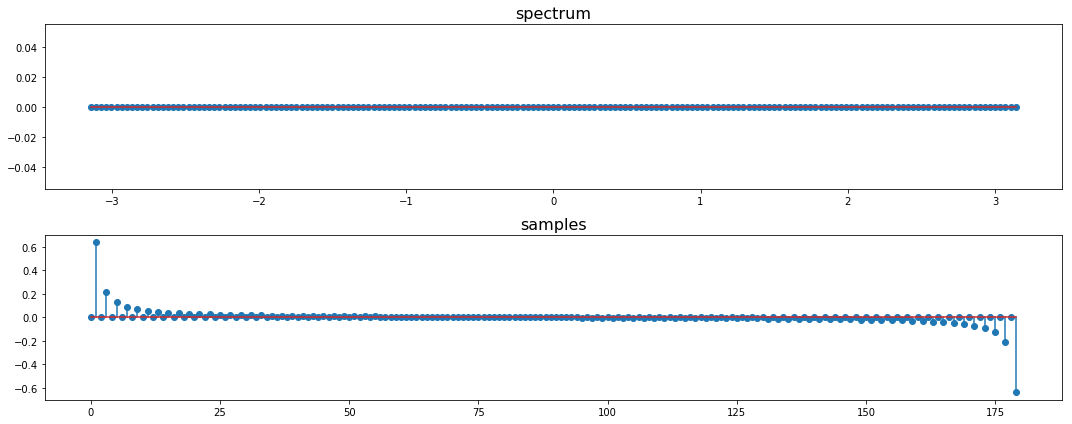

In [49]:
h = Fourier.idtft(H, plt_abs=False, flip_samples=False)

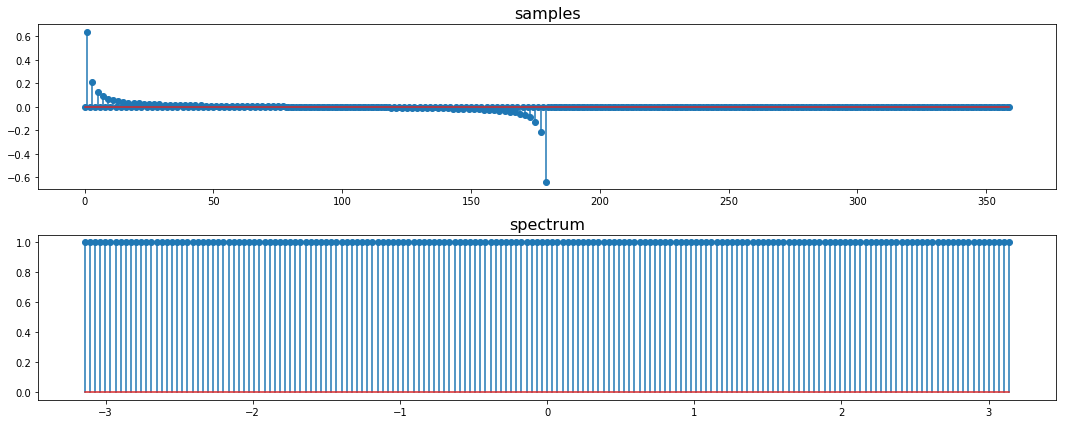

In [50]:
x = DSP.delta(n)
x1 = Convolver.convolve(x, h)
X1 = Fourier.dtft(x1)

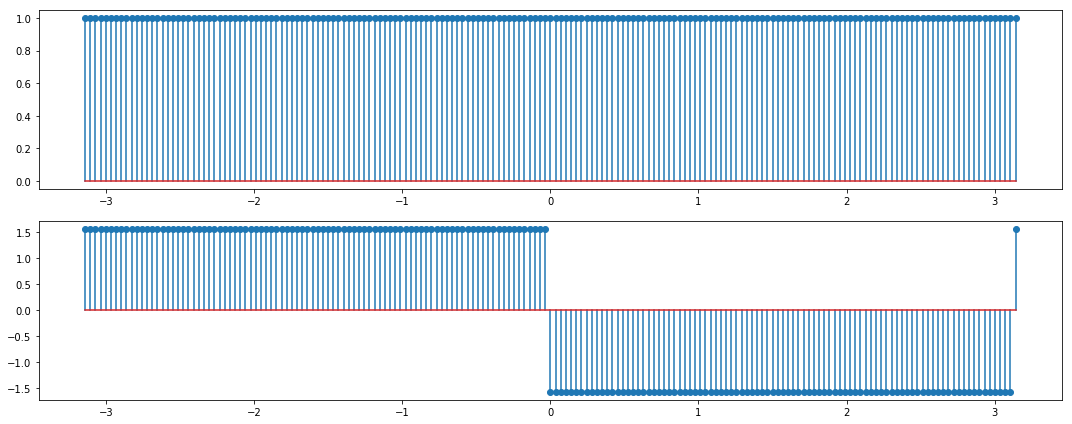

In [51]:
DSP.plot_comparison((np.abs(X1), np.angle(X1)), x_series = (w, w))

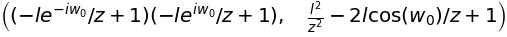

In [52]:
from sympy import symbols, conjugate, E, I
    
l, w0= symbols('l, w0', real = True)
p = E**(I*w0)

product, simplified = Filter.simplify_coefficients_product([(1,-l*p),(1,-l*conjugate(p))])
product, simplified

No handles with labels found to put in legend.
No handles with labels found to put in legend.


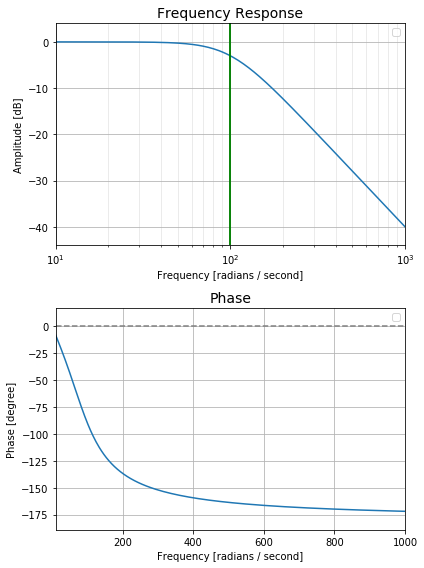

In [53]:
from scipy import signal

b, a = signal.butter(2, 100, 'lowpass', analog=True)  # {‚Äòlowpass‚Äô, ‚Äòhighpass‚Äô, ‚Äòbandpass‚Äô, ‚Äòbandstop‚Äô}, 
w, h = signal.freqs(b, a)

Filter.plot_freq_phase_response(w, h, wc = [100, ])

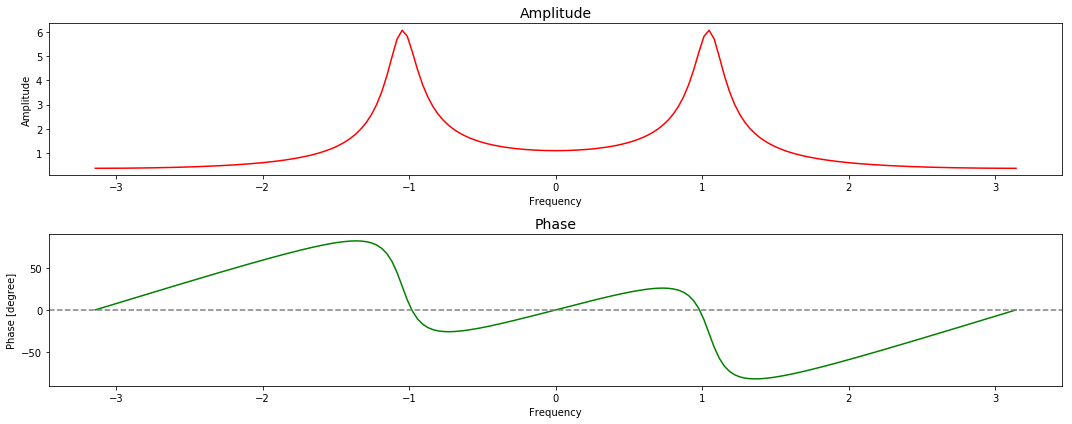

In [54]:
w0 = np.pi/3
p = np.exp(1j*w0)
l = 0.9

b = [1]

poles = [l*p, l*np.conj(p)]
a = Filter.get_polynomials_coeff_from_roots(poles)

w=DSP.get_freq_bins()
freqs, H = Filter.get_H_from_polynomials([b], [a])
Filter.plot_freq_phase_response_pi2(freqs, H)

## MinMax ÁöÑ filter ÊáâË©≤ÂÖ∑Êúâ linear phase shift

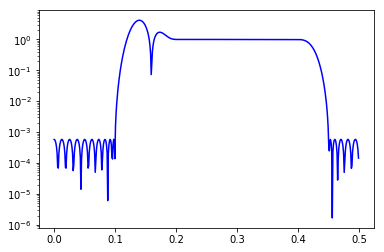

In [55]:
>>> from scipy import signal
>>> bpass = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
>>> freq, response = signal.freqz(bpass)#, DSP.get_freq_bins())
>>> ampl = np.abs(response)
>>>
>>> import matplotlib.pyplot as plt
>>> fig = plt.figure()
>>> ax1 = fig.add_subplot(111)
>>> ax1.semilogy(freq/(2*np.pi), ampl, 'b-')  # freq in Hz
>>> plt.show()

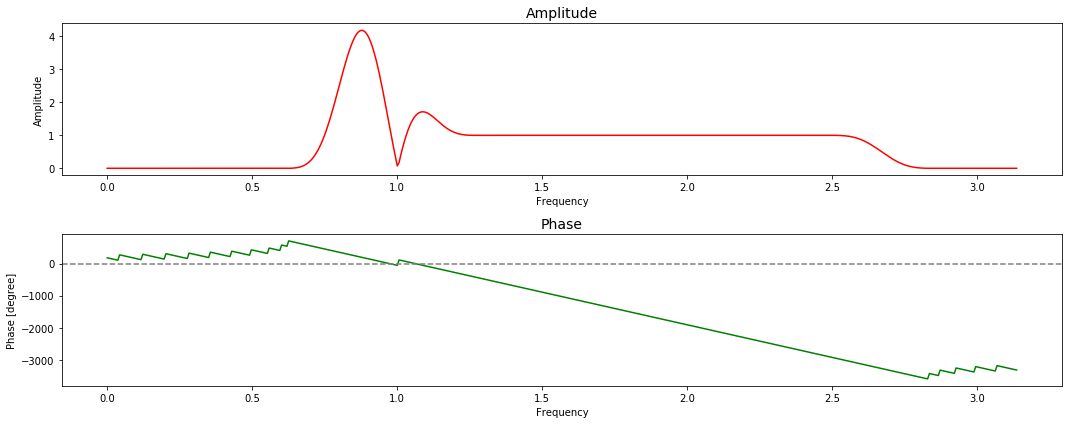

In [56]:
Filter.plot_freq_phase_response_pi2(freq, response)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


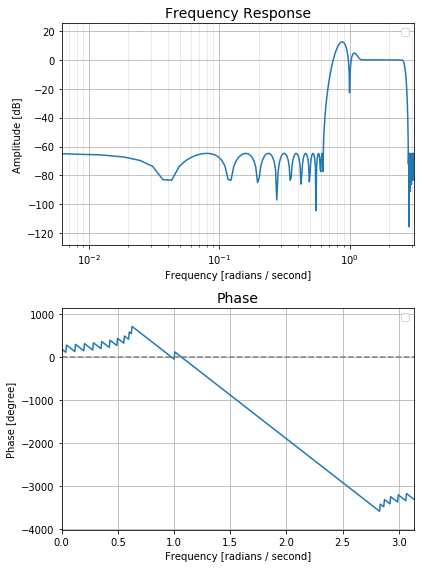

In [57]:
Filter.plot_freq_phase_response(freq, response)

## Notch filter

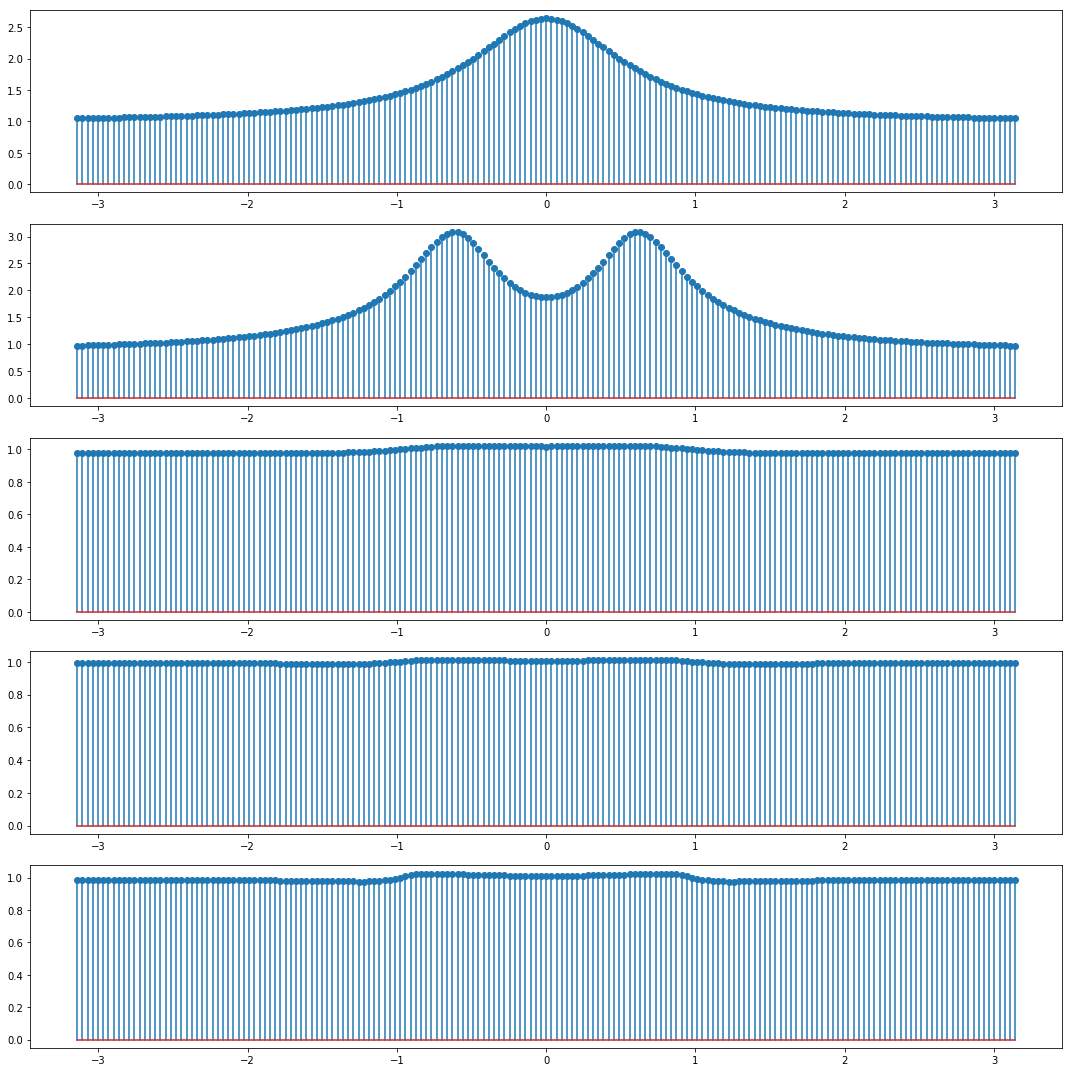

In [58]:
left_filters = [([0.9896542675974899, 0, -0.9896542675974899], [1, -1.2220167447497137, 0.3740876836572318]),
([0.8575094311585659, 0, -0.8575094311585659], [1, -0.6089680324686029, 0.45766341649271447]),
([0.9828956245182227, -0.8923971849328173, 0.9552794404567384], [1, -0.8923971849328173, 0.9381750649749611]),
([0.9932490990628525, -0.5642087106004618, 0.9897175344401132], [1, -0.5642087106004618, 0.9829666335029658]),
([0.9891846844318654, 0.45208706768319745, 0.9613917981531604], [1, 0.45208706768319745, 0.9505764825850258]),]

right_filters = [([0.9896542675974899, 0, -0.9896542675974899], [1, -1.2220167447497137, 0.3740876836572318]),
([0.8575094311585659, 0, -0.8575094311585659], [1, -0.6089680324686029, 0.45766341649271447]),
([0.9828956245182227, -0.8923971849328173, 0.9552794404567384], [1, -0.8923971849328173, 0.9381750649749611]),
([0.9932490990628525, -0.5642087106004618, 0.9897175344401132], [1, -0.5642087106004618, 0.9829666335029658]),
([0.9891846844318654, 0.45208706768319745, 0.9613917981531604], [1, 0.45208706768319745, 0.9505764825850258])]

figs = []
freqs = DSP.get_freq_bins()

for ba in right_filters:
    b, a = ba
    w, h = signal.freqs(b, a, freqs)
    figs.append(abs(h))
    
    
DSP.plot_comparison(figs, [w] * len(figs))

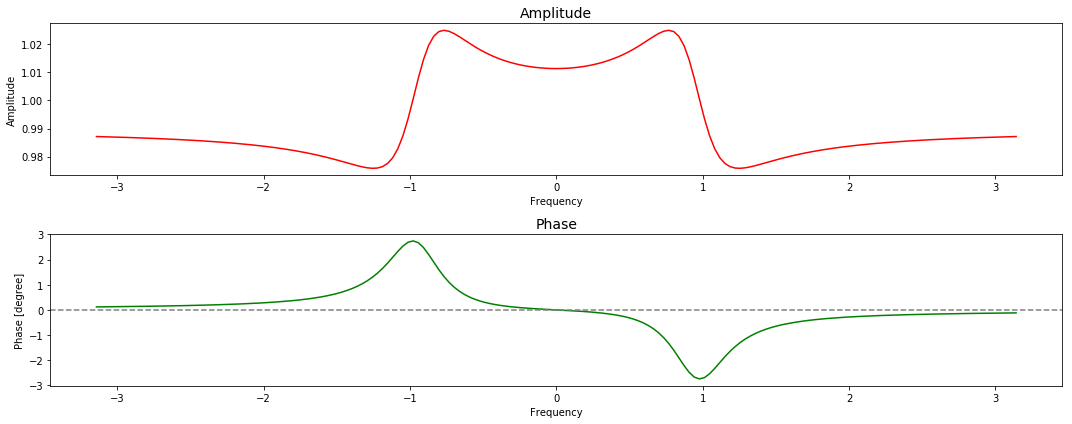

In [59]:
Filter.plot_freq_phase_response_pi2(w, h)

### Â∞á H(z) ËΩâÊàê CCDE

#### Leaky Integrator
$
H(z) = \frac{(1-\lambda)}{1-\lambda z^{-1}} \\
y[n] = (1-\lambda)x[n] + \lambda y[n-1]
$

### Music over Ultrasonic

In [60]:
from waves.sound.tools.synthesizer import *

freq_carrier = 20000
freq_beat  = 0
freq_left  = freq_carrier + freq_beat / 2
freq_right = freq_carrier - freq_beat / 2
sig_l = thinkdsp.SinSignal(freq = freq_left)
sig_r = thinkdsp.SinSignal(freq = freq_right)

ss = StereoSignal(sig_l, sig_r)
ss.play(0.1)

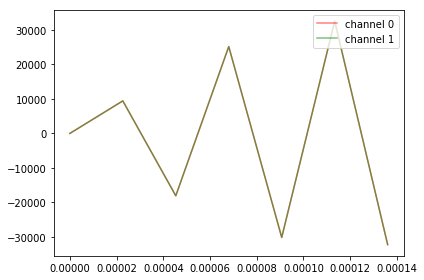

In [61]:
ss.plot()

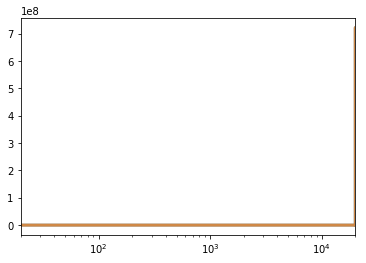

In [62]:
wf = ss.make_waves()
tmb = wf.make_spectrums()
tmb.plot()

In [63]:
tmb.timbers[0].rank_by_amps()

(array([20000., 15900., 11800., ..., 18571., 17178., 11774.]),
 array([7.22498133e+08, 3.90045100e+03, 3.02651042e+03, ...,
        3.75429995e-18, 3.57541808e-18, 3.26823493e-18]))

## example on the net
https://www.youtube.com/watch?v=hri7c5bm-_c  10:00  

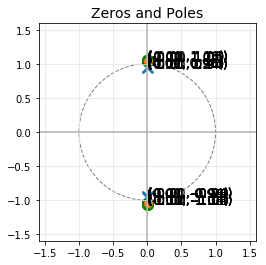

In [64]:
w = DSP.get_freq_bins()
z = np.exp(1j*w)
Hz = ((z**-2 + 0.95**2) / (1 + 0.95**2*z**-2))**8
    
b = np.polynomial.polynomial.polypow([0.95**2, 0, 1], 8) 
a = np.polynomial.polynomial.polypow([1, 0, 0.95**2], 8) 

z, p, k = signal.tf2zpk(b, a)
Filter.plot_zplane(z, p)

#### ‰ΩúËÄÖÊèê‰æõÁöÑ H(z)Ôºåamplitude ÈÉΩÁÇ∫ 0Ôºå‰∏çÂêàÁêÜ

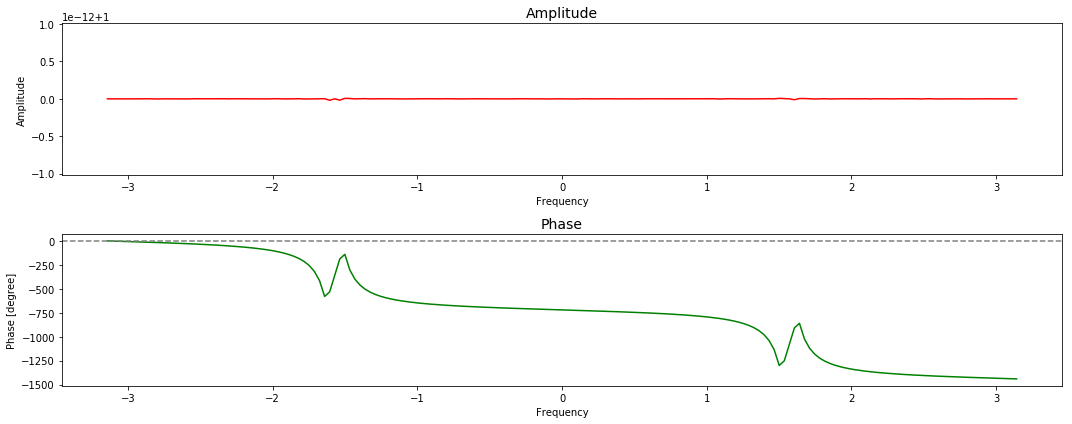

In [65]:
Filter.plot_freq_phase_response_pi2(w, Hz)

#### ÂÖàÂæû zeros, poles Ë®àÁÆóÂá∫ b, aÔºåÂÜçÂ•óÁî® scipy.signal.freqz

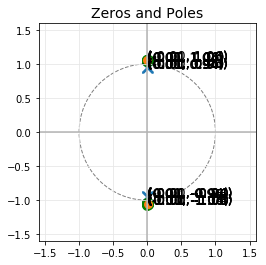

In [66]:
zeros = np.tile([0+1j, 0-1j], 8) / 0.95
poles = np.tile([0+1j, 0-1j], 8) * 0.95

b = Filter.get_polynomials_coeff_from_roots(zeros)
a = Filter.get_polynomials_coeff_from_roots(poles)

z, p, k = signal.tf2zpk(b, a)
Filter.plot_zplane(z, p)

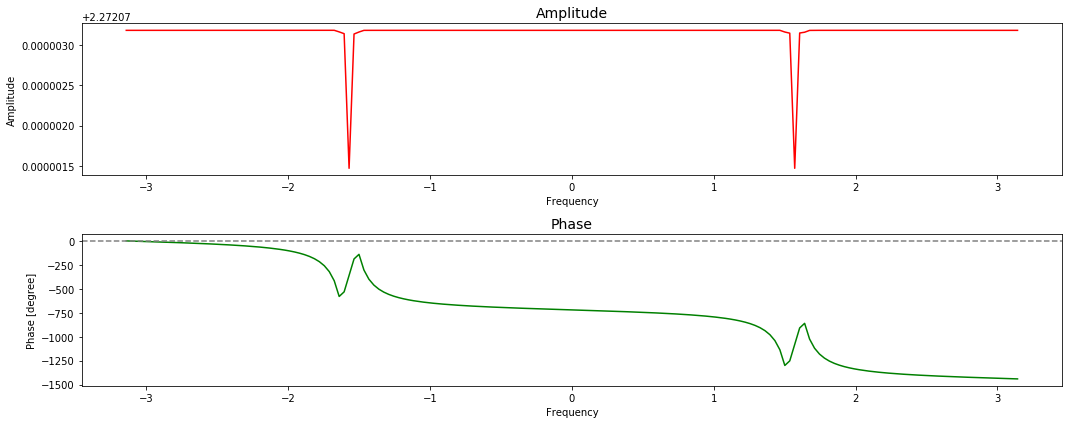

In [67]:
f, h = signal.freqz(b, a, w)
Filter.plot_freq_phase_response_pi2(f, h)

#### Â∞áÊ≠•È©üÂåÖÂú®Ëá™Ë®ÇÁöÑÊñπÊ≥ï‰∏≠

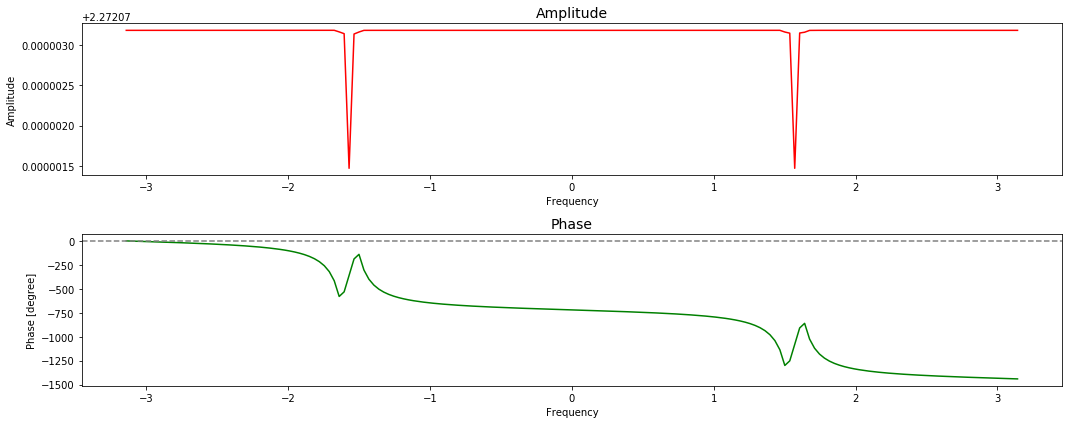

In [68]:
f, h = Filter.get_H_from_zeros_poles(zeros, poles, 180, plot = True) 